In [34]:
# A/B Testing General Assembly : Step 1 --> Upload of data and check data accuracy.
# Upload of data base via csv file.
path2Tableau = r"C:\Users\guillaume_julie\Desktop\Data Analytics - A_B Test.csv"
import pandas as pd
import numpy as np
from scipy import stats as st
import scipy.stats as scs
import matplotlib.pyplot as plt
data = pd.read_csv(path2Tableau) 
# header = data.head(0) 
df_data = pd.DataFrame(data,columns=['user_id','timestamp', 'Experiment Group', 'landing_page', 'Sign Up'])
print(df_data.info())
print(df_data.pivot_table(values='Sign Up', index=['Experiment Group','landing_page'], aggfunc=np.sum))
# It looks like some users from treatment group landed on the old page. We need to clean up the data to compare apples with apples. 
#It looks like some users from treatment group landed on the old page. We need to check, using a loop, that users landed on the good pages
#df_data['concatenation'] = df_data[['Experiment Group', 'landing_page']].apply(lambda x: ''.join(x), axis=1)
dummy = []
for i, row in df_data.iterrows():
    if ((row['Experiment Group'] == 'treatment' and row['landing_page'] == 'new_page') or
        (row['Experiment Group'] == 'control' and row['landing_page'] == 'old_page')):
        dummy.append(1)
    else:
        dummy.append(0)
dummy = pd.DataFrame(dummy)
df_data['dummy_1'] = dummy
df_data.head(130)
df_data_cleaned = df_data.drop(df_data.query('dummy_1 == 0').index)
df_data_cleaned 
# One is going to use the data frame df_data_cleaned for the rest of the development.
# For checking --> print(df_data_cleaned.loc[df_data['dummy_1'] == 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 5 columns):
user_id             7538 non-null int64
timestamp           7538 non-null object
Experiment Group    7538 non-null object
landing_page        7538 non-null object
Sign Up             7538 non-null int64
dtypes: int64(2), object(3)
memory usage: 294.5+ KB
None
                               Sign Up
Experiment Group landing_page         
control          new_page            8
                 old_page          407
treatment        new_page          604
                 old_page            5


,user_id,timestamp,Experiment Group,landing_page,Sign Up,dummy_1
0,898458,1/24/2017 0:00:06,treatment,new_page,0,1
1,919802,1/24/2017 0:00:09,control,old_page,0,1
2,635490,1/24/2017 0:00:10,control,old_page,0,1
3,751774,1/24/2017 0:00:17,treatment,new_page,0,1
4,789808,1/24/2017 0:00:22,control,old_page,0,1
5,775448,1/24/2017 0:00:22,treatment,new_page,0,1
6,922516,1/24/2017 0:00:27,control,old_page,0,1
7,848540,1/24/2017 0:00:30,control,old_page,0,1
8,897304,1/24/2017 0:00:45,control,old_page,0,1
9,844828,1/24/2017 0:00:47,control,old_page,0,1


In [28]:
# A/B Testing General Assembly : Step 2 --> Calculation of conversion rate using pivot. 
ab_summary = df_data_cleaned.pivot_table(values='Sign Up', index='Experiment Group', aggfunc=np.sum)
# Add additional columns to the pivot table
ab_summary['total'] = df_data_cleaned.pivot_table(values='Sign Up', index='Experiment Group', aggfunc=lambda x: len(x))
ab_summary['rate'] = df_data_cleaned.pivot_table(values='Sign Up', index='Experiment Group')
print (ab_summary)
# The conversion rate of group treatment is 5.56% higher in absolute than the control group. The new page generated a relative growth of 51% in conversions. The gap or growth of conventions is a good start, but they do not represent certain pieces of evidence. At this point, we have not measured how confident we are in this result. It can be mitigated by looking at the distributions.

                  Sign Up  total      rate
Experiment Group                          
control               407   3754  0.108418
treatment             604   3681  0.164086


In [40]:
print(ab_summary['rate'])
print()
print(ab_summary['rate']['control'])

Experiment Group
control      0.108418
treatment    0.164086
Name: rate, dtype: float64

0.10841768779968033


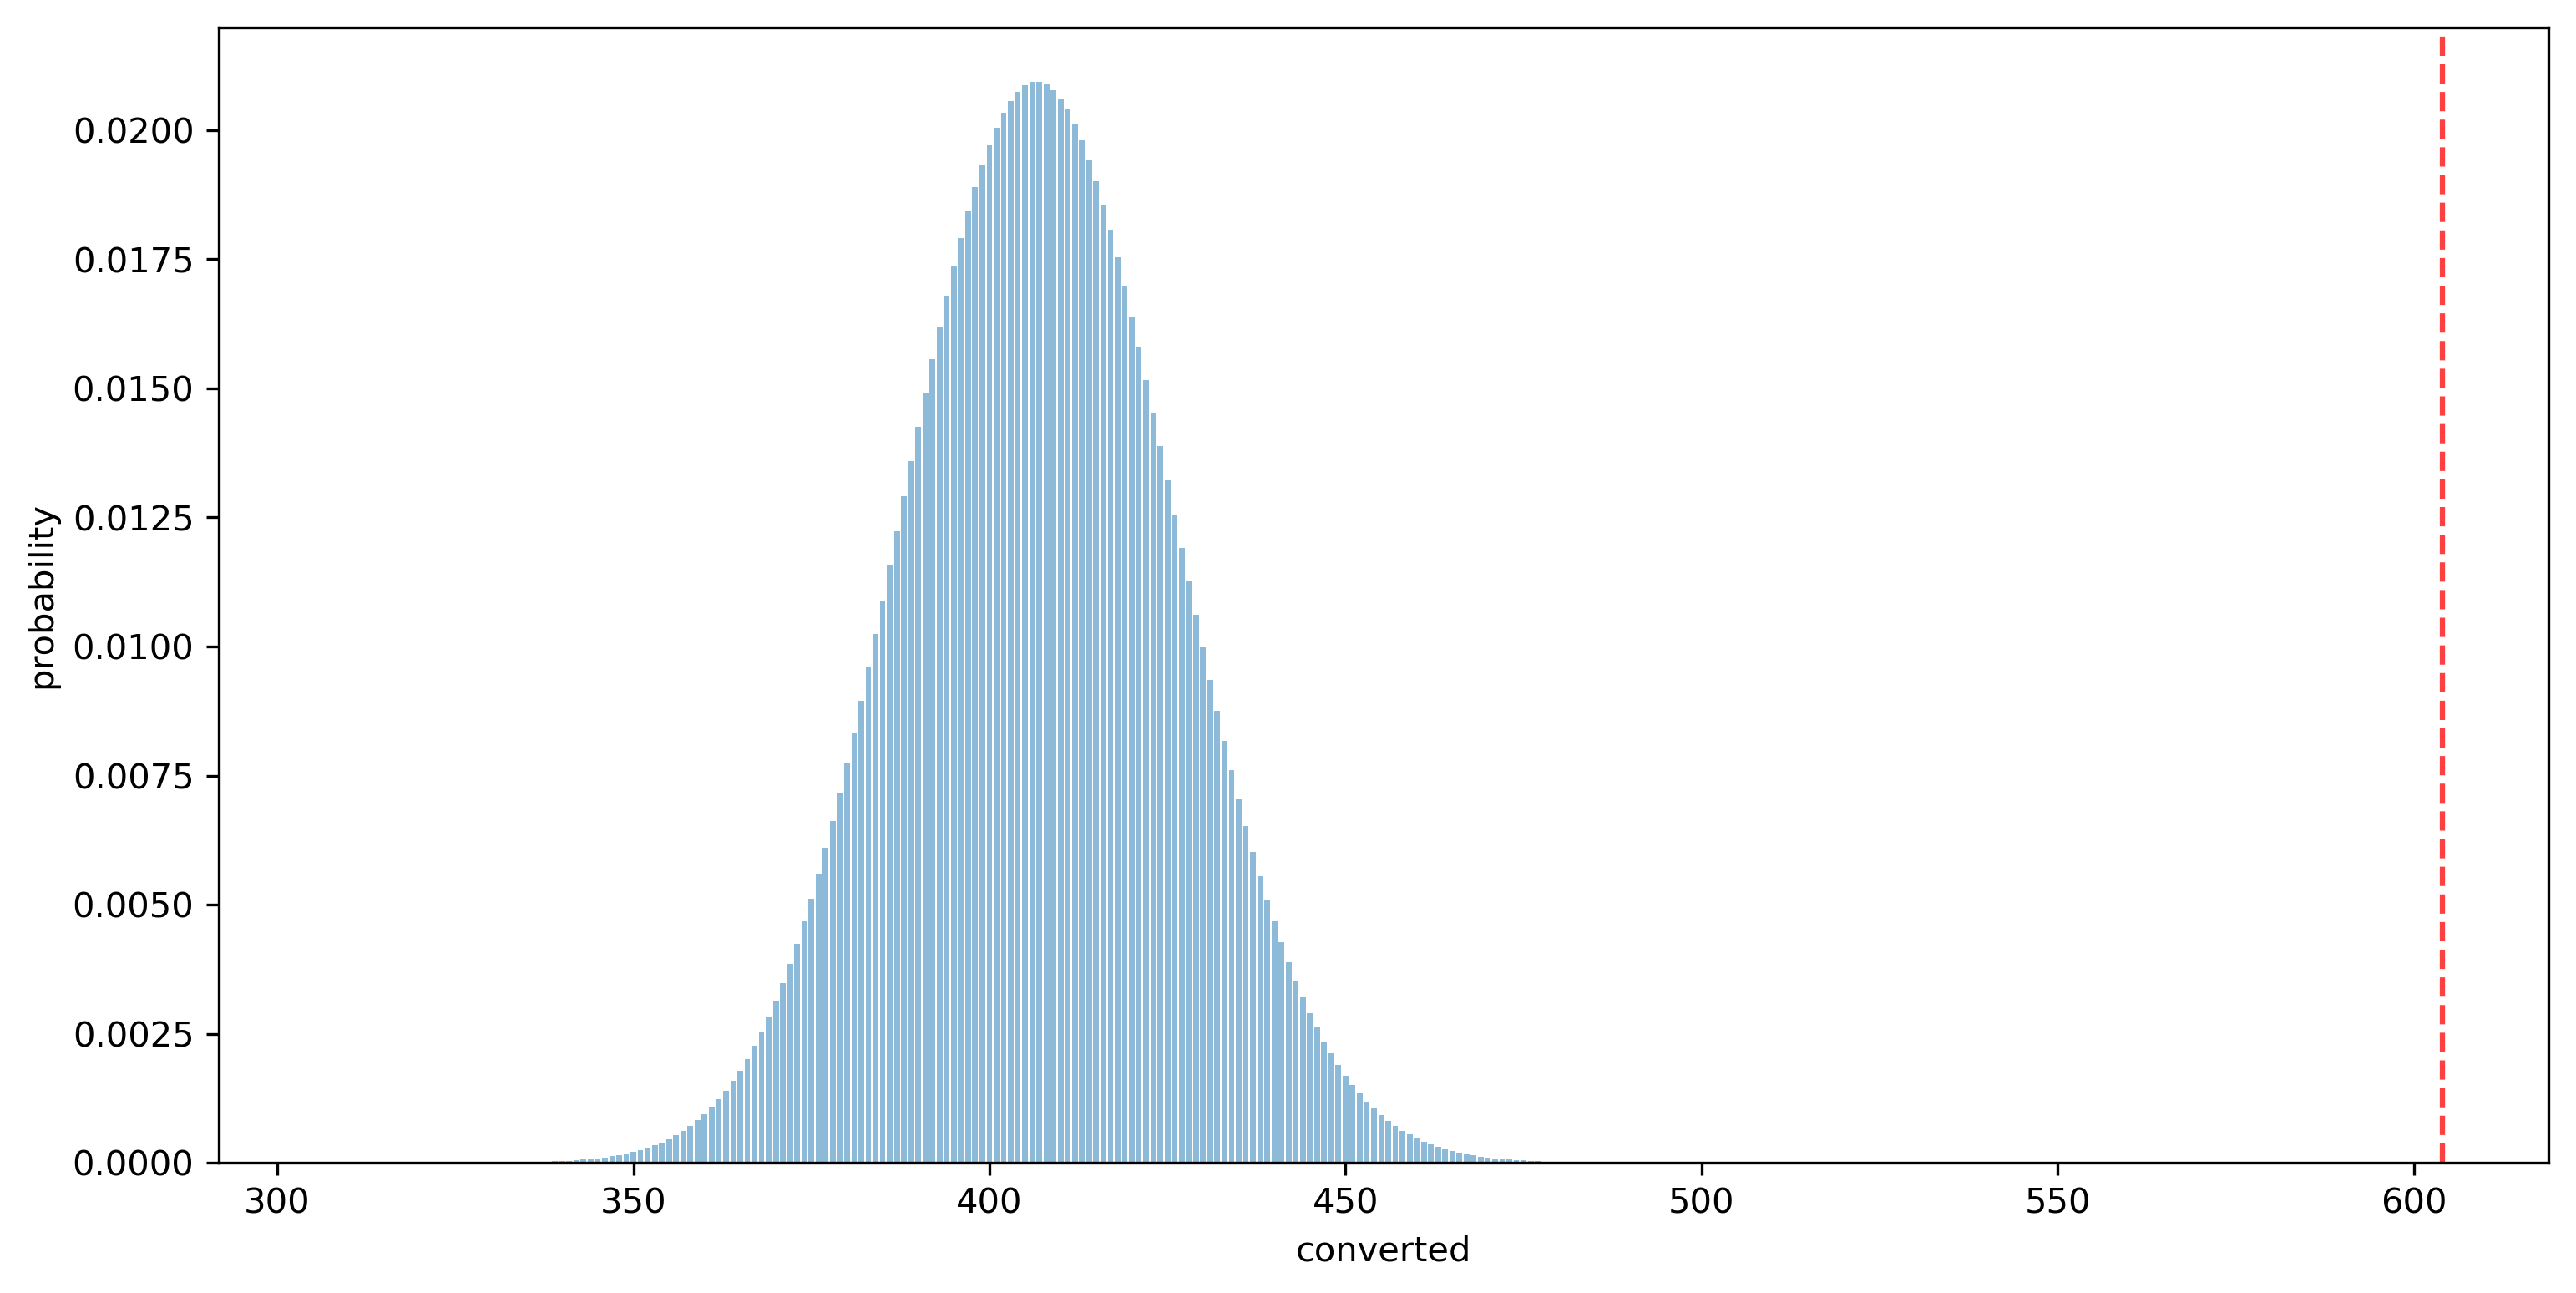

In [3]:
# A/B Testing General Assembly : Step 3 --> Plot distribution of the control group.
# Calculate the convertion rate to plot a binomial distribution 
fig, plot_control = plt.subplots(figsize=(12,6), dpi=300)
control_total = df_data_cleaned['user_id'].loc[df_data_cleaned['Experiment Group']=='control'].count()
control_converted = df_data_cleaned['Sign Up'].loc[df_data_cleaned['Experiment Group']=='control'].sum()
cr_control = control_converted/control_total
Start = control_converted
End = control_converted
Sample = 200
x1 = np.linspace(Start-100, End+100, 200, dtype = int)
y1 = scs.binom(control_total, cr_control).pmf(x1)
plt.xlabel('converted')
plt.ylabel('probability')
# A probability mass function (pmf) is a function that gives the probability that a discrete random variable is equal to some values
plot_control.bar(x1, y1, alpha=0.5)
# alpha=0.5 is to make the color of bars lighter
# Lets plot a line showing the conversion of the treatment group
treatment_converted = df_data_cleaned['Sign Up'].loc[df_data_cleaned['Experiment Group']=='treatment'].sum()
plot_control.axvline(x=treatment_converted, c='red', alpha = 0.75, linestyle = '--')
# The distribution for the control group is in blue light, and the red dashed line indicates the result from the treatment group. We can see that the probability of getting the result from the treatment group was very low. However, this observation does not convey the confidence level of the results. It does not take the sample size of our test group into consideration.

AxesSubplot(0.125,0.125;0.775x0.755)


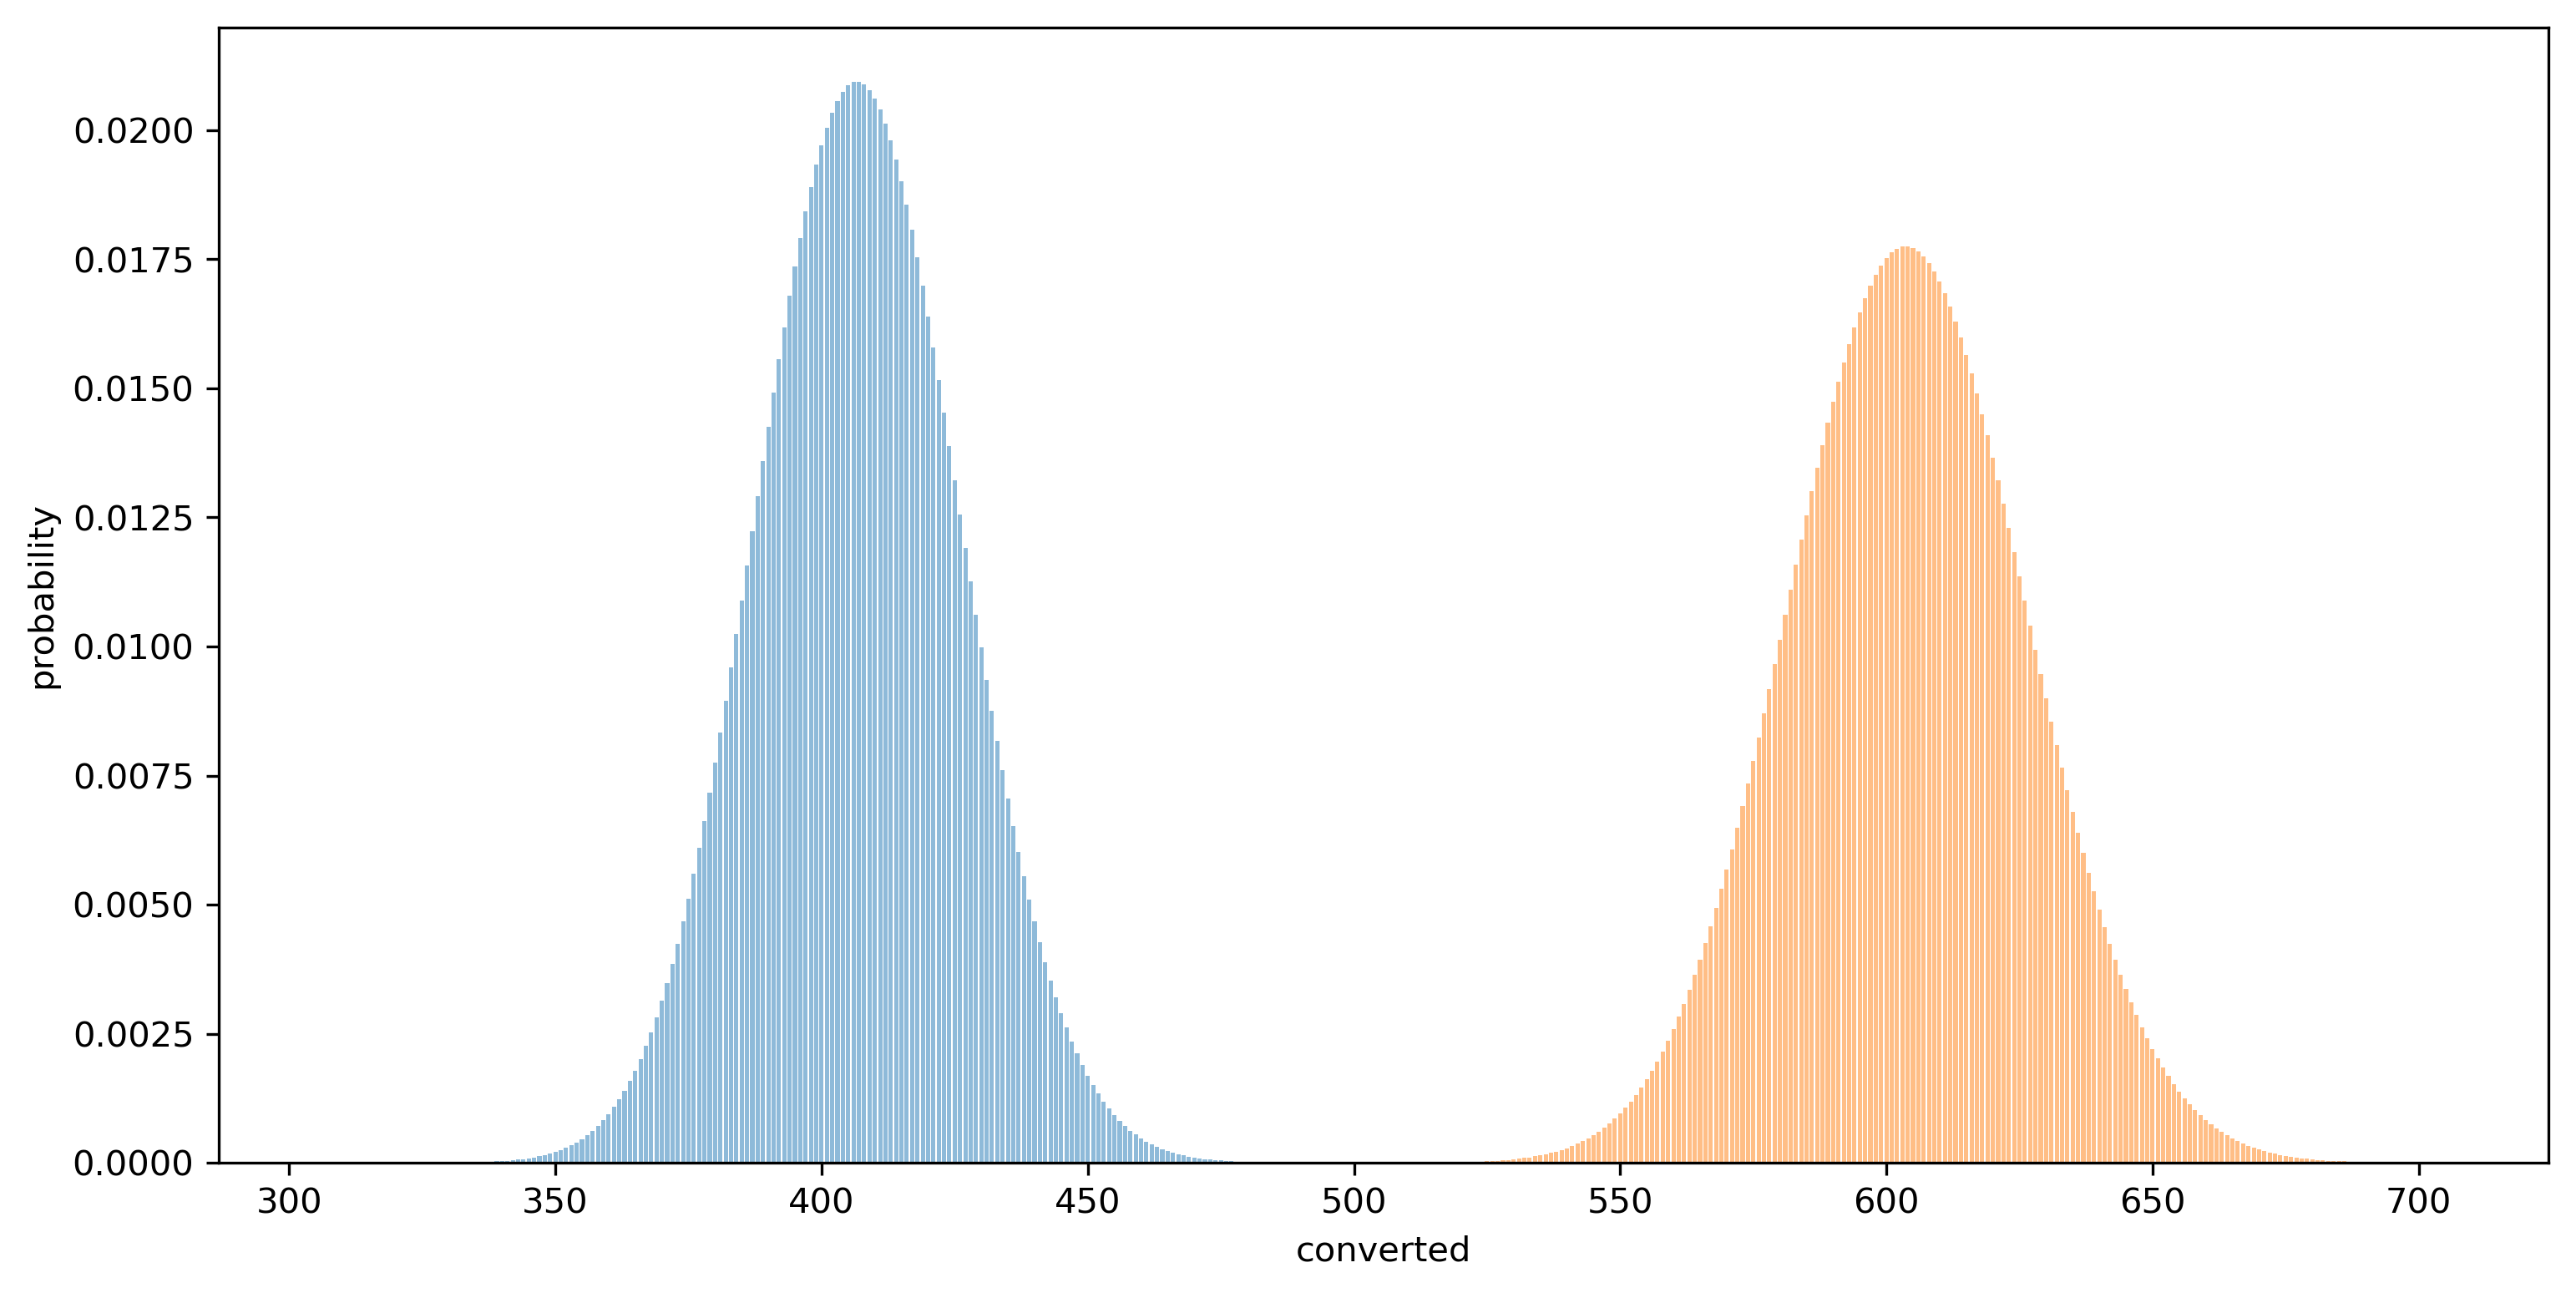

In [4]:
# A/B Testing General Assembly : Step 4 --> Plot distribution of the treatment group.
# Calculate the convertion rate to plot a binomial distribution 
fig, plot_groups = plt.subplots(figsize=(12,6), dpi=300)
treatment_total = df_data_cleaned['user_id'].loc[df_data_cleaned['Experiment Group']=='treatment'].count()
cr_treatment = treatment_converted/treatment_total
Start = treatment_converted
End = treatment_converted
Sample = 200
x2 = np.linspace(Start-100, End+100, 200, dtype = int)
y2 = scs.binom(treatment_total, cr_treatment).pmf(x2)
plt.xlabel('converted')
plt.ylabel('probability')
plot_groups.bar(x1, y1, alpha = 0.5)
plot_groups.bar(x2,y2, alpha = 0.5)
print (plot_groups)
# We can see that the treatment group converted more users than the control group. We can also see that the peak of treatment group results is lower than the control group.

AxesSubplot(0.125,0.125;0.775x0.755)


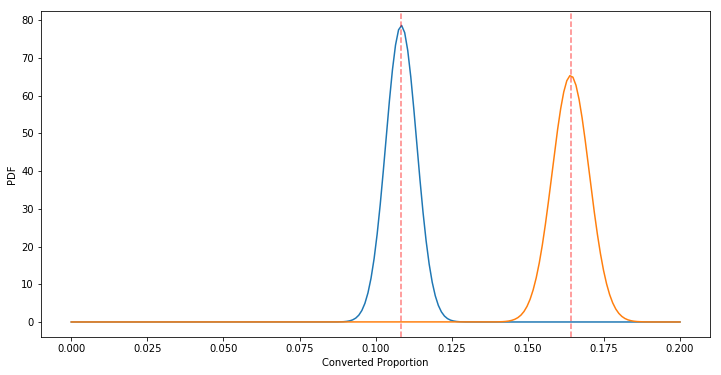

In [5]:
# A/B Testing General Assembly : Step 5 --> Plot distribution of conversion rates.
# How do we interpret the difference in peak probability? Instead of comparing curves, we should focus more on the conversion rates, so we have an apple to apple comparison. We need to standardize the data and analyze the probability of successes, p, for each group. Considering the Bernoulli distribution, p is the conversion probability. According to the central limit theorem, by calculating many sample means we can approximate the true mean of the population. The distribution of the sample means, p, will be normally distributed around the true mean with a standard deviation equal to the standard error of the mean.
# Calculation of standard errors of means for both groups
p_control = cr_control
p_treatment = cr_treatment
SE_control = np.sqrt(p_control * (1-p_control)) / np.sqrt(control_total)
SE_treatment = np.sqrt(p_treatment * (1-p_treatment)) / np.sqrt(treatment_total)
fi, plot_3 = plt.subplots(figsize = (12,6))
start = 0
end = 0.2
sample_size = 200
x = np.linspace(start, end, sample_size)
yc = scs.norm(p_control, SE_control).pdf(x) 
yt = scs.norm(p_treatment, SE_treatment).pdf(x)
# PDF --> Probability Density Function
plot_3.plot(x, yc)
plot_3.plot(x, yt)
plot_3.axvline(x = p_control, c = 'red', alpha = 0.5, linestyle = '--')
plot_3.axvline(x = p_treatment, c = 'red', alpha = 0.5, linestyle = '--')
plt.xlabel('Converted Proportion')
plt.ylabel('PDF')
print(plot_3)
# The red lines represent the mean conversion rate of each group. The distance between the lines is equal to the mean difference names d_hat.  We can see that there is no overlap between curves. This observation is a good indication of the real impact of the new page over the treatment group. Although, to validate the statistic significance one needs to run a z-test.

In [6]:
# A/B Testing General Assembly : Step 6 --> Z-Test.
# Calculation of a z-test with a confidence level of 95%
# Ho: d = 0 
# Ha: d = p_control - p_treatment
alpha = 0.05
# Calculation of the pool probability p_pool
p_pool = (control_converted + treatment_converted) / (control_total + treatment_total)
# Calculation of the variance of control group
v_control = (p_control*(1-p_control))
# Calculation of the variance of control group
v_treatment = (p_treatment*(1-p_treatment))
# Calculation of the pool standard error 
se_pool = np.sqrt((v_treatment/treatment_total)+(v_control/control_total))
# second way to calculate --> se_pool = np.sqrt(p_pool*(1-p_pool)*(1/control_total+1/treatment_total))
# Calculation of Z
z = (p_treatment - p_control)/se_pool
# Calculation of p value from z
p_val = st.norm.cdf(z)
print("===Z Test===")
print(z)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
if 1-p_val<alpha:
    print("The null hypothesis of equal means can be rejected")
else:
    print("The null hypothesis of equal means cannot be rejected")
 # p_value = 0.9999999999988328 with an alpha of 0.05 the null hypothesis of equal means can be rejected


===Z Test===
7.01288966156065


===P-Value===
0.9999999999988328


The null hypothesis of equal means can be rejected


Text(0.5, 0, 'd')

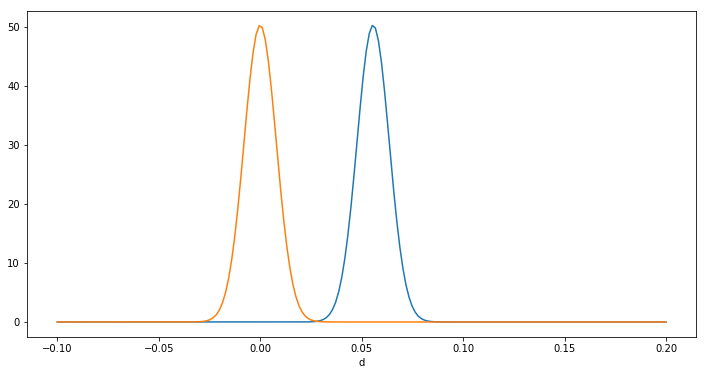

In [7]:
# A/B Testing General Assembly : Step 7 --> plot Ho and Ha
d_hat = p_treatment - p_control
fi, plot_4 = plt.subplots(figsize = (12,6))
start = -0.1
end = 0.2
sample_size = 200
x = np.linspace(start, end, sample_size)
y_Ha = scs.norm(d_hat, se_pool).pdf(x) 
y_Ho = scs.norm(0, se_pool).pdf(x)
plot_4.plot(x, y_Ha)
plot_4.plot(x, y_Ho)
plt.xlabel('d')

In [17]:
# A/B Testing General Assembly : Step 8 --> Calculation of power effect
# Statistical power, or the power of a hypothesis test is the probability that the test correctly rejects the null hypothesis
from statsmodels.stats.power import NormalIndPower
AB_effect_size = d_hat/se_pool
normal_power = NormalIndPower()
normal_power.solve_power(effect_size = AB_effect_size, nobs1 = control_total, alpha = 0.05, power = None, ratio = treatment_total/control_total, alternative = "two-sided")
# So far I have been unable to solve this error

1.0